# Project 4: Statistics of U.S Education Data Set

## 1. Importing Data

In [39]:
import pandas as pd

data = pd.read_csv('./data/us_education/states_all.csv')

In [40]:
data.head(20)

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN
5,1992_COLORADO,COLORADO,1992,NaN,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,50648.0,45025.0,34533.0,394904.0,160299.0,562613.0,221.023429,272.398433,213.480890,266.419687
6,1992_CONNECTICUT,CONNECTICUT,1992,NaN,3834302.0,143542.0,1342539.0,2348221.0,3721338.0,2148041.0,...,38058.0,33691.0,28366.0,304284.0,126917.0,436932.0,226.798480,273.739345,222.417599,264.713904
7,1992_DELAWARE,DELAWARE,1992,NaN,645233.0,45945.0,420942.0,178346.0,638784.0,372722.0,...,8272.0,8012.0,6129.0,67495.0,28338.0,96296.0,217.899972,262.868585,206.389052,261.577921
8,1992_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,1992,NaN,709480.0,64749.0,0.0,644731.0,742893.0,329160.0,...,5832.0,5000.0,3433.0,47009.0,18173.0,70000.0,192.600553,234.924621,178.557612,265.976765
9,1992_FLORIDA,FLORIDA,1992,NaN,11506299.0,788420.0,5683949.0,5033930.0,11305642.0,5166374.0,...,164416.0,142372.0,100835.0,1276685.0,511557.0,1819706.0,213.689751,259.908848,204.882606,262.118986


## 2. Feature Details

### Enrollment
#### A breakdown of students enrolled in schools by school year.

- GRADES_4_G: Number of students in fourth grade.
- GRADES_8_G: Number of students in eighth grade.
- GRADES_12_G: Number of students in twelfth grade.
- GRADES_1_8_G: Number of students in the first through eighth grades.
- GRADES 9_12_G: Number of students in the ninth through twelfth grades.
- GRADES_ALL_G: The count of all students in the state. Comparable to ENROLL in the financial data (which is the U.S. Census Bureau's estimate for students in the state).


### Financials
#### A breakdown of states by revenue and expenditure.

ENROLL: The U.S. Census Bureau's count for students in the state. Should be comparable to GRADES_ALL (which is the NCES's estimate for students in the state).
TOTAL REVENUE: The total amount of revenue for the state.

- FEDERAL_REVENUE
- STATE_REVENUE
- LOCAL_REVENUE
- TOTAL_EXPENDITURE: The total expenditure for the state.
- INSTRUCTION_EXPENDITURE

### Academic Achievement
#### A breakdown of student performance as assessed by the corresponding exams 
#### (math and reading, grades 4 and 8).

- AVG_MATH_4_SCORE: The state's average score for fourth graders taking the NAEP math exam.
- AVG_MATH_8_SCORE: The state's average score for eight graders taking the NAEP math exam.
- AVG_READING_4_SCORE: The state's average score for fourth graders taking the NAEP reading exam.
- AVG_READING_8_SCORE: The state's average score for eighth graders taking the NAEP reading exam.

## 3. Questions to answer

  a) Is there a correlation to observe among features?
  
  b) What is the observed distrubution of the data from one feature to the other?
  
  c) What is the influence of total revenue, federal revenue and state revenue on total enrollment?
  
  d) How does instruction expenditure effect academic achievement?
  
  e) Can we predict enrollment based on influencing features?

## 4. General Data Cleaning

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

%matplotlib inline
## Current columns of data
data.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

In [42]:
## Feature selection
drop_features = ['PRIMARY_KEY', 'LOCAL_REVENUE', 'OTHER_EXPENDITURE', 'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G', 'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G'] 
print(drop_features)

['PRIMARY_KEY', 'LOCAL_REVENUE', 'OTHER_EXPENDITURE', 'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G', 'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G']


In [43]:
data = data.drop(drop_features, axis = 1)

In [44]:
data.head(3)

,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,2653798.0,1481703.0,735036.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,972488.0,498362.0,350902.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,3401580.0,1435908.0,1007732.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895


In [45]:
# Changing column names for convenience and changed 
data = data.rename(columns = {'STATE': 'state', 'YEAR': 'year', 'ENROLL': 'enroll', 'TOTAL_REVENUE': 'total_revenue', 'FEDERAL_REVENUE': 'federal_revenue', 'STATE_REVENUE' : 'state_revenue', 'TOTAL_EXPENDITURE' : 'total_expenditure', 'INSTRUCTION_EXPENDITURE': 'instruction_expenditure', 'SUPPORT_SERVICES_EXPENDITURE' : 'support_services_expenditure', 'GRADES_1_8_G' : 'grades_1_8', 'GRADES_9_12_G' : 'grades_9_12', 'GRADES_ALL_G' : 'grades_all', 'AVG_MATH_4_SCORE' : 'grade4_mathscore', 'AVG_MATH_8_SCORE' : 'grade8_mathscore', 'AVG_READING_4_SCORE': 'grade4_readingscore', 'AVG_READING_8_SCORE': 'grade8_readingscore'})

In [46]:
data.head(3)

,state,year,enroll,total_revenue,federal_revenue,state_revenue,total_expenditure,instruction_expenditure,support_services_expenditure,grades_1_8,grades_9_12,grades_all,grade4_mathscore,grade8_mathscore,grade4_readingscore,grade8_readingscore
0,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,2653798.0,1481703.0,735036.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,972488.0,498362.0,350902.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,3401580.0,1435908.0,1007732.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895


In [47]:
# shape of data
data.shape

(1492, 16)

In [48]:
# Counting number of null or na values in each columns
data.isna().sum()

state                             0
year                              0
enroll                          263
total_revenue                   212
federal_revenue                 212
state_revenue                   212
total_expenditure               212
instruction_expenditure         212
support_services_expenditure    212
grades_1_8                      131
grades_9_12                     131
grades_all                      173
grade4_mathscore                956
grade8_mathscore                960
grade4_readingscore             959
grade8_readingscore             994
dtype: int64

## 5. What is the influence of total revenue, federal revenue and state revenue on total enrollment?

#### What is mean value of total revenue for each state?
#### Is there null/NaN values to drop/clean?

In [49]:
# Three features to 
revenue_mean_bystate = data[['state', 'total_revenue', 'federal_revenue', 'state_revenue', 'enroll']].groupby(['state'], as_index = False).mean()

In [50]:
print(revenue_mean_bystate)

                                       state  total_revenue  federal_revenue  \
0                                    ALABAMA   5.545855e+06     6.037489e+05   
1                                     ALASKA   1.720040e+06     2.515863e+05   
2                             AMERICAN_SAMOA            NaN              NaN   
3                                    ARIZONA   6.577442e+06     7.865178e+05   
4                                   ARKANSAS   3.611404e+06     4.074118e+05   
5                                         AS            NaN              NaN   
6                                         BI            NaN              NaN   
7                                        BIE            NaN              NaN   
8                   BUREAU_OF_INDIAN_AFFAIRS            NaN              NaN   
9                  BUREAU_OF_INDIAN_EDUCATIO            NaN              NaN   
10                BUREAU_OF_INDIAN_EDUCATION            NaN              NaN   
11                                CALIFO

In [51]:
# sum of all NaN values
revenue_mean_bystate.isna().sum()

state               0
total_revenue      29
federal_revenue    29
state_revenue      29
enroll             29
dtype: int64

In [52]:
# Dropping NaN mean values from total_revenue_bystate
revenue_mean_bystate = revenue_mean_bystate.dropna()

In [53]:
revenue_mean_bystate.head(3)

,state,total_revenue,federal_revenue,state_revenue,enroll
0,ALABAMA,5545854.92,603748.88,3188192.24,736584.333333
1,ALASKA,1720039.64,251586.32,1069718.48,130429.625000
3,ARIZONA,6577442.12,786517.80,2771293.36,874322.083333


In [54]:
revenue_mean_bystate.describe()

,total_revenue,federal_revenue,state_revenue,enroll
count,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01
mean,9.107284e+06,7.679028e+05,4.225979e+06,9.175901e+05
std,1.091343e+07,9.964702e+05,5.181790e+06,1.069983e+06
min,1.003774e+06,8.024992e+04,0.000000e+00,6.053119e+04
25%,2.402235e+06,2.352191e+05,1.316866e+06,2.723158e+05
50%,5.545855e+06,5.220586e+05,2.752737e+06,6.490130e+05
75%,1.015829e+07,7.780069e+05,5.198862e+06,1.005376e+06
max,5.579920e+07,5.788586e+06,3.096928e+07,5.945343e+06


In [71]:
revenue_mean_bystate.corr()

,total_revenue,federal_revenue,state_revenue,enroll
total_revenue,1.000000,0.953552,0.974758,0.963690
federal_revenue,0.953552,1.000000,0.961473,0.990864
state_revenue,0.974758,0.961473,1.000000,0.960951
enroll,0.963690,0.990864,0.960951,1.000000


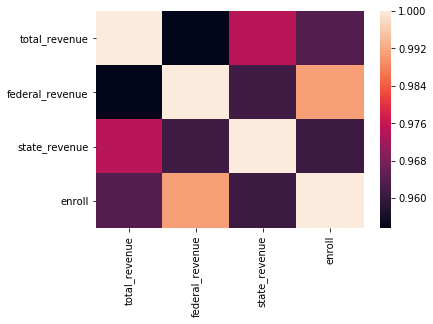

In [72]:
sns.heatmap(revenue_mean_bystate.corr())

## 6. Is there a correlation to observe among features?

In [67]:
data.corr()

,year,enroll,total_revenue,federal_revenue,state_revenue,total_expenditure,instruction_expenditure,support_services_expenditure,grades_1_8,grades_9_12,grades_all,grade4_mathscore,grade8_mathscore,grade4_readingscore,grade8_readingscore
year,1.000000,0.033393,0.236281,0.275597,0.220017,0.229592,0.228180,0.247312,0.030393,0.070147,0.037877,0.691727,0.490964,0.327086,0.201923
enroll,0.033393,1.000000,0.914077,0.893755,0.914520,0.915009,0.880823,0.917537,0.997033,0.995357,0.997681,-0.005537,-0.037240,-0.067467,-0.006419
total_revenue,0.236281,0.914077,1.000000,0.928324,0.972590,0.999024,0.990375,0.994848,0.898374,0.927197,0.906995,0.163007,0.111477,0.066415,0.020289
federal_revenue,0.275597,0.893755,0.928324,1.000000,0.920741,0.928646,0.893734,0.931638,0.870636,0.901819,0.880561,0.123957,0.045111,-0.038412,0.010612
state_revenue,0.220017,0.914520,0.972590,0.920741,1.000000,0.970056,0.954485,0.968782,0.902103,0.931911,0.909988,0.126164,0.070389,0.009954,0.017162
total_expenditure,0.229592,0.915009,0.999024,0.928646,0.970056,1.000000,0.991347,0.993314,0.898292,0.926939,0.906932,0.158988,0.108318,0.063147,0.022551
instruction_expenditure,0.228180,0.880823,0.990375,0.893734,0.954485,0.991347,1.000000,0.976889,0.865823,0.894244,0.872927,0.160238,0.112391,0.083314,0.030369
support_services_expenditure,0.247312,0.917537,0.994848,0.931638,0.968782,0.993314,0.976889,1.000000,0.900891,0.930590,0.910130,0.169020,0.115861,0.065281,0.018656
grades_1_8,0.030393,0.997033,0.898374,0.870636,0.902103,0.898292,0.865823,0.900891,1.000000,0.994447,0.999344,-0.018618,-0.043314,-0.084583,-0.005831
grades_9_12,0.070147,0.995357,0.927197,0.901819,0.931911,0.926939,0.894244,0.930590,0.994447,1.000000,0.996964,0.022175,-0.010550,-0.055256,-0.006702


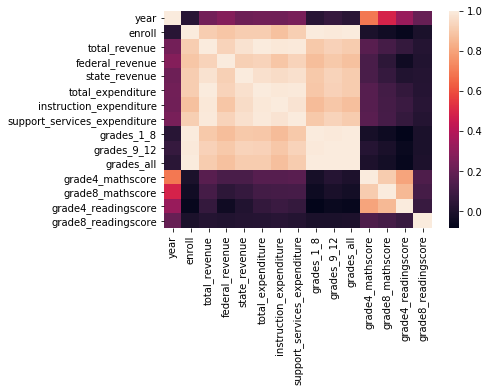

In [69]:
sns.heatmap(data.corr())

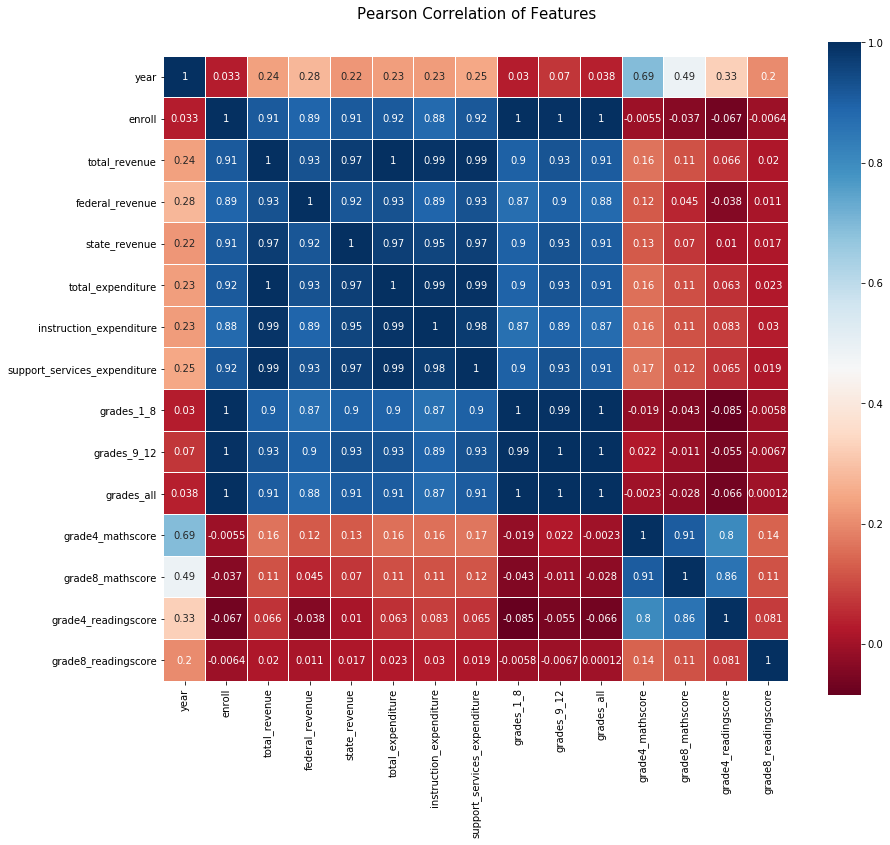

In [70]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(data.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

## 7. What is the observed distrubution of the data from one feature to the other?

/Users/erdentumurbaatar/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/Users/erdentumurbaatar/anaconda3/lib/python3.6/site-packages/matplotlib/tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


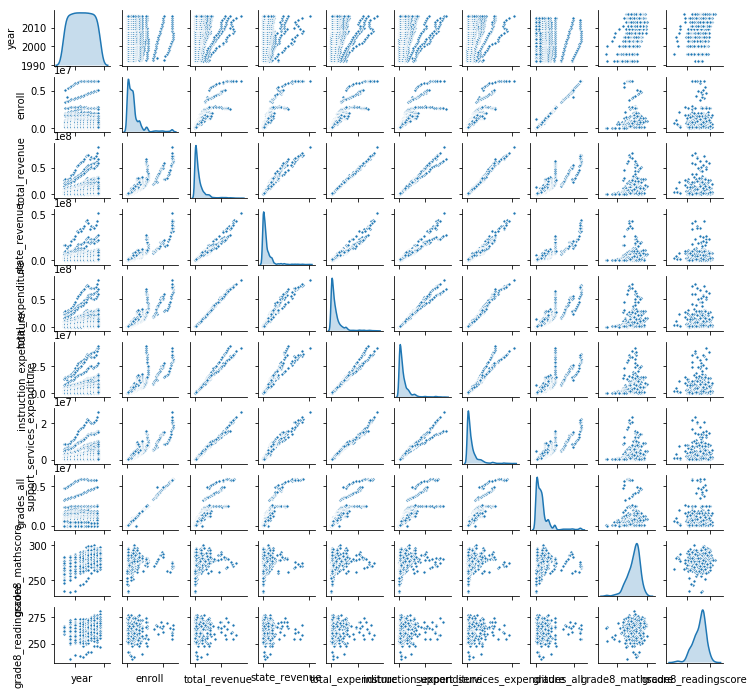

In [78]:
# I chose few features, I thought that it is relevant
features = ['year','enroll','total_revenue', 'state_revenue', 'total_expenditure', 'instruction_expenditure', 'support_services_expenditure', 'grades_all', 'grade8_mathscore', 'grade8_readingscore']

df = sns.pairplot(data[features], palette = 'seismic',size=1.2,diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=10) )
df.set(xticklabels=[])

 ## 8. How does instruction expenditure effect academic achievement?

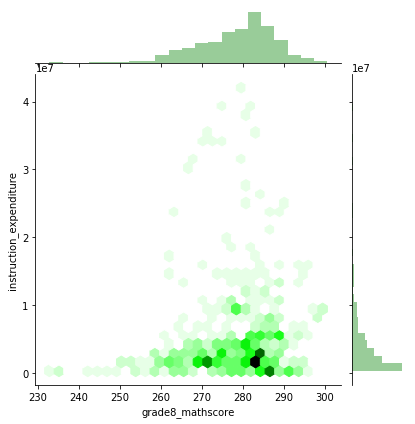

In [99]:
# Features to focus to determine the effect of instruction expenditure on academic achievement
data.columns
features1 = ['enroll','instruction_expenditure', 'grade8_mathscore','grade8_readingscore']


g1 = sns.jointplot('grade8_mathscore', 'instruction_expenditure', data=data[features1], kind="hex", color = 'g')

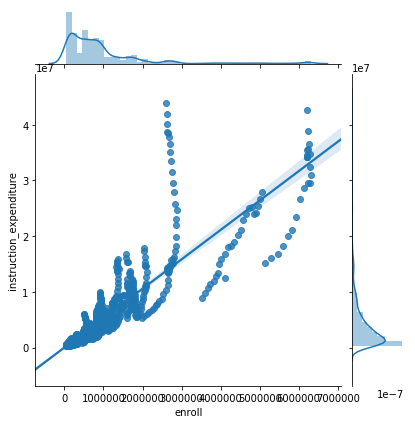

In [97]:
g2 = sns.jointplot('enroll', 'instruction_expenditure', data=data[features1], kind = "reg" )

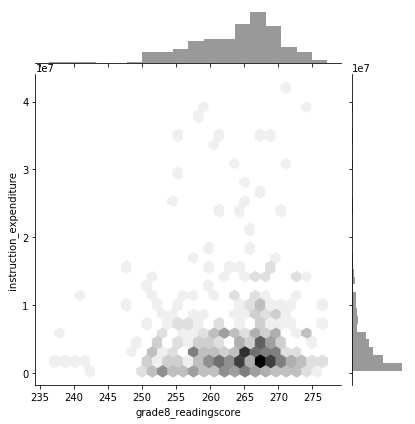

In [104]:
g3 = sns.jointplot('grade8_readingscore', 'instruction_expenditure', data=data[features1], kind = "hex", color = 'k' )

We could say that instruction expenditure have some influence on enrollment rate rather than academic achievement.